In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
dataset = pd.read_csv('Mall_Customers.csv')

In [10]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
X = dataset.iloc[:, 3:5].values

In [12]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [13]:
pip install hdbscan


   ---------------------------------------- 0.0/727.3 kB ? eta -:--:--
   --------------------------------------- 727.3/727.3 kB 15.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
from hdbscan import HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=5)  
y_hdbscan = hdbscan.fit_predict(X)

In [15]:
supervised_hdbscan = dataset.copy()
supervised_hdbscan['Cluster_group'] = y_hdbscan
supervised_hdbscan.to_csv("cluster_hdbscan.csv", index=False)

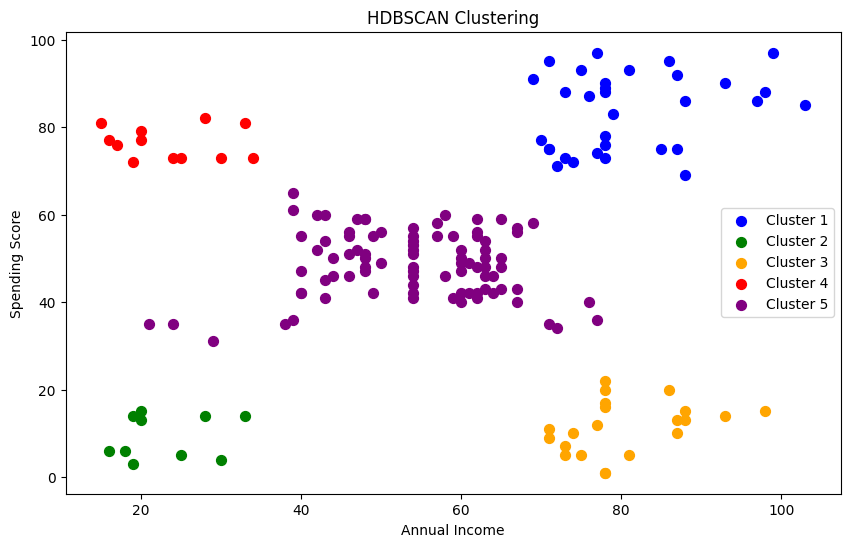

In [16]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_hdbscan == 0, 0], X[y_hdbscan == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X[y_hdbscan == 1, 0], X[y_hdbscan == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X[y_hdbscan == 2, 0], X[y_hdbscan == 2, 1], s=50, c='orange', label='Cluster 3')
plt.scatter(X[y_hdbscan == 3, 0], X[y_hdbscan == 3, 1], s=50, c='red', label='Cluster 4')
plt.scatter(X[y_hdbscan == 4, 0], X[y_hdbscan == 4, 1], s=50, c='purple', label='Cluster 5')

plt.title('HDBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

C:\Users\Malya\anaconda3\envs\aimlds\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


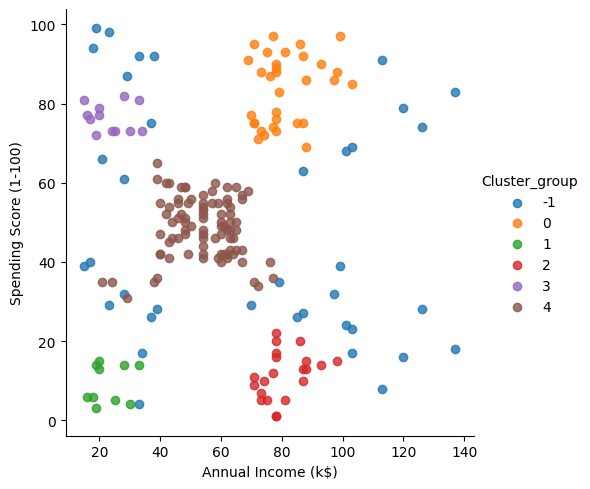

In [17]:
facet_hdbscan = sns.lmplot(data=supervised_hdbscan, x=supervised_hdbscan.columns[3], y=supervised_hdbscan.columns[4], hue='Cluster_group',
                            fit_reg=False, legend=True, legend_out=True)